In [63]:
import pandas as pd
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [26]:
folder_path = 'data'

# Use glob to get a list of all Excel files in the folder
csv_files = glob.glob(f'{folder_path}/*.csv')

# Loop through each CSV file and read it into a Pandas DataFrame
dfs = []
for file in csv_files:
    df = pd.read_csv(file, sep=";")
    print(file, df.shape)
    dfs.append(df)

# If you want to concatenate all DataFrames into a single DataFrame, you can use pd.concat
combined_df = pd.concat(dfs, ignore_index=False)

combined_df.to_csv("data//game_logs", index=False)

data\sportsref_download (1).xls.csv (82, 30)
data\sportsref_download (10).xls.csv (65, 30)
data\sportsref_download (11).xls.csv (72, 30)
data\sportsref_download (12).xls.csv (82, 30)
data\sportsref_download (13).xls.csv (82, 30)
data\sportsref_download (2).xls.csv (66, 30)
data\sportsref_download (3).xls.csv (82, 30)
data\sportsref_download (4).xls.csv (82, 30)
data\sportsref_download (5).xls.csv (82, 30)
data\sportsref_download (6).xls.csv (82, 30)
data\sportsref_download (7).xls.csv (82, 30)
data\sportsref_download (8).xls.csv (82, 30)
data\sportsref_download (9).xls.csv (82, 30)
data\sportsref_download.xls.csv (82, 30)


In [34]:
df = pd.read_csv("data//game_logs", sep=",")
df.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,27/10/2010,22-227,GSW,NaN,HOU,W (+4),1,39:04:00,...,1.0,2.0,11.0,0.0,1.0,5.0,4.0,25.0,20.2,4.0
1,2,2.0,29/10/2010,22-229,GSW,NaN,LAC,W (+18),1,26:53:00,...,2.0,2.0,6.0,2.0,0.0,2.0,2.0,16.0,15.7,17.0
2,3,NaN,31/10/2010,22-231,GSW,@,LAL,L (-24),Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,03/11/2010,22-234,GSW,NaN,MEM,W (+6),Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3.0,05/11/2010,22-236,GSW,NaN,UTA,W (+7),1,32:59:00,...,1.0,1.0,6.0,2.0,0.0,5.0,5.0,20.0,10.4,8.0


In [51]:
def get_season(date):
    year = date.split("/")[2]
    month = date.split("/")[1]

    if 1 <= int(month) <= 5:
        year = str(int(year) - 1)

    season = year + "-" + str(int(year) + 1)
    return season

In [54]:
df["Season"] = df["Date"].apply(get_season)
df.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,New,Season
0,1,1.0,27/10/2010,22-227,GSW,NaN,HOU,W (+4),1,39:04:00,...,11.0,0.0,1.0,5.0,4.0,25.0,20.2,4.0,2010-2011,2010-2011
1,2,2.0,29/10/2010,22-229,GSW,NaN,LAC,W (+18),1,26:53:00,...,6.0,2.0,0.0,2.0,2.0,16.0,15.7,17.0,2010-2011,2010-2011
2,3,NaN,31/10/2010,22-231,GSW,@,LAL,L (-24),Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-2011,2010-2011
3,4,NaN,03/11/2010,22-234,GSW,NaN,MEM,W (+6),Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-2011,2010-2011
4,5,3.0,05/11/2010,22-236,GSW,NaN,UTA,W (+7),1,32:59:00,...,6.0,2.0,0.0,5.0,5.0,20.0,10.4,8.0,2010-2011,2010-2011


In [70]:
df["Year"] = df["Season"].apply(lambda x: x[:4]).astype(int)
df.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Season,Year
0,1,1.0,27/10/2010,22-227,GSW,NaN,HOU,W (+4),1,39:04:00,...,11.0,0.0,1.0,5.0,4.0,25.0,20.2,4.0,2010-2011,2010
1,2,2.0,29/10/2010,22-229,GSW,NaN,LAC,W (+18),1,26:53:00,...,6.0,2.0,0.0,2.0,2.0,16.0,15.7,17.0,2010-2011,2010
2,3,NaN,31/10/2010,22-231,GSW,@,LAL,L (-24),Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-2011,2010
3,4,NaN,03/11/2010,22-234,GSW,NaN,MEM,W (+6),Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-2011,2010
4,5,3.0,05/11/2010,22-236,GSW,NaN,UTA,W (+7),1,32:59:00,...,6.0,2.0,0.0,5.0,5.0,20.0,10.4,8.0,2010-2011,2010


In [68]:
df["Year"].value_counts()

2010    82
2021    82
2022    82
2012    82
2013    82
2014    82
2015    82
2016    82
2017    82
2018    82
2009    82
2020    72
2011    66
2019    65
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='PTS'>

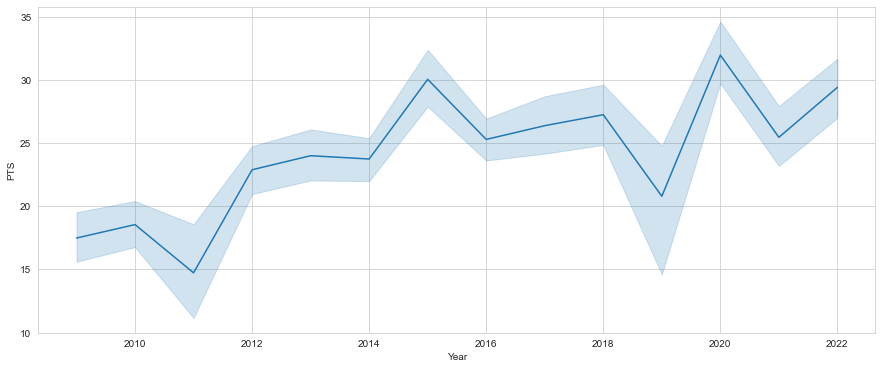

In [71]:
plt.figure(figsize=(15,6))
sns.lineplot(x="Year", y="PTS", data=df)

In [74]:
df["PTS"].value_counts().sum()

882

In [75]:
df["GS"].value_counts()

1                876
Inactive         191
Did Not Dress     18
Did Not Play      14
0                  6
Name: GS, dtype: int64